<a href="https://colab.research.google.com/github/vrramakanth/capstone_project_practice/blob/main/Capstone_Phase2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Load the "Air Traffic passenger statistics.csv" and "airplane crash fatalities.csv" files, remove nulls, duplicates, and outliers from both datasets.

## Load data

### Subtask:
Load the Air Traffic passenger statistics and airplane crash fatalities CSV files into pandas DataFrames.


**Reasoning**:
The first step is to import the pandas library and load the two specified CSV files into pandas DataFrames as instructed.



In [11]:
import pandas as pd

air_traffic_df = pd.read_csv('/content/Air_Traffic_Passenger_Statistics.csv')
airplane_crashes_df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908-2.csv')

## Handle missing values

### Subtask:
Remove any rows with null values from both DataFrames.


**Reasoning**:
Since the previous attempt to load the data failed, I will try loading the data again before attempting to remove null values.



## Handle missing values

### Subtask:
Remove any rows with null values from both DataFrames.


**Reasoning**:
Load the data again since the previous attempts failed, then remove rows with null values from both dataframes as per the instructions.



**Reasoning**:
The previous attempt failed because the dataframes were not loaded in the current session. I will load the data, perform the cleaning steps (removing nulls, duplicates, and outliers), and then display the head and info of the cleaned dataframes as requested by the subtask.



In [13]:
import pandas as pd

air_traffic_df = pd.read_csv('/content/Air_Traffic_Passenger_Statistics.csv')
airplane_crashes_df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908-2.csv')

air_traffic_df = air_traffic_df.dropna()
airplane_crashes_df = airplane_crashes_df.dropna()

air_traffic_df = air_traffic_df.drop_duplicates()
airplane_crashes_df = airplane_crashes_df.drop_duplicates()

def remove_outliers_iqr(df, columns):
    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

air_traffic_numerical_cols = air_traffic_df.select_dtypes(include=['number']).columns.tolist()
airplane_crashes_numerical_cols = airplane_crashes_df.select_dtypes(include=['number']).columns.tolist()

air_traffic_df = remove_outliers_iqr(air_traffic_df, air_traffic_numerical_cols)
airplane_crashes_df = remove_outliers_iqr(airplane_crashes_df, airplane_crashes_numerical_cols)

print("Air Traffic DataFrame after cleaning:")
display(air_traffic_df.head())
print("\nAir Traffic DataFrame Info:")
air_traffic_df.info()

print("\nAirplane Crashes DataFrame after cleaning:")
display(airplane_crashes_df.head())
print("\nAirplane Crashes DataFrame Info:")
airplane_crashes_df.info()

Air Traffic DataFrame after cleaning:


,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
5,200507,Air China,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,6263,Deplaned,6263,2005,July
6,200507,Air China,CA,Air China,CA,International,Asia,Enplaned,Other,International,G,5500,Enplaned,5500,2005,July
7,200507,Air France,AF,Air France,AF,International,Europe,Deplaned,Other,International,A,12050,Deplaned,12050,2005,July
8,200507,Air France,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,11638,Enplaned,11638,2005,July



Air Traffic DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 11684 entries, 2 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              11684 non-null  int64 
 1   Operating Airline            11684 non-null  object
 2   Operating Airline IATA Code  11684 non-null  object
 3   Published Airline            11684 non-null  object
 4   Published Airline IATA Code  11684 non-null  object
 5   GEO Summary                  11684 non-null  object
 6   GEO Region                   11684 non-null  object
 7   Activity Type Code           11684 non-null  object
 8   Price Category Code          11684 non-null  object
 9   Terminal                     11684 non-null  object
 10  Boarding Area                11684 non-null  object
 11  Passenger Count              11684 non-null  int64 
 12  Adjusted Activity Type Code  11684 non-null  object
 13  Adjuste

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
208,01/19/1930,18:23,"Oceanside, California",Maddux Airlines,7,"Aqua Caliente, Mexico - Los Angeles",Ford 5-AT-C Tri Motor,NC9689,5-AT-046,16.0,16.0,0.0,"While en route to Los Angeles, the pilot, flyi..."
236,03/31/1931,10:45,"Bazaar, Kansas",Trans Continental and Western Air,599,Kansas City - Wichita - Los Angeles,Fokker F10A Trimotor,NC-999,1063,8.0,8.0,0.0,"Shortly after taking off from Kansas City, one..."
334,08/31/1934,23:42,"Amazonia, Missouri",Rapid Air Transport,6,Omaha - St. Joseph,Stinson SM-6000B,NC10809,5004,5.0,5.0,0.0,The plane crashed about 11 miles from St. Jose...
354,05/06/1935,03:30,"Atlanta, Missouri",Trans Continental and Western Air,6,Los Angeles - Albuquerque - Kanasas City - Wa...,Douglas DC-2-112,NC13785,1295,14.0,5.0,0.0,The plane crashed while en route from Albuquer...
365,08/14/1935,23:45,"Near Gilmer, Texas",Delta Air Lines,4,Dallas - Atlanta,Stinson Model A,NC14599,9103,4.0,4.0,0.0,Crashed 3 miles south of Gilmer. The outboard ...



Airplane Crashes DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 208 to 5259
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          800 non-null    object 
 1   Time          800 non-null    object 
 2   Location      800 non-null    object 
 3   Operator      800 non-null    object 
 4   Flight #      800 non-null    object 
 5   Route         800 non-null    object 
 6   Type          800 non-null    object 
 7   Registration  800 non-null    object 
 8   cn/In         800 non-null    object 
 9   Aboard        800 non-null    float64
 10  Fatalities    800 non-null    float64
 11  Ground        800 non-null    float64
 12  Summary       800 non-null    object 
dtypes: float64(3), object(10)
memory usage: 87.5+ KB


## Summary:

### Data Analysis Key Findings

*   The task involved loading and cleaning two datasets: "Air Traffic passenger statistics.csv" and "airplane crash fatalities.csv".
*   The cleaning steps included removing null values, duplicates, and outliers.
*   The process consistently failed at the initial step of loading the data due to a `FileNotFoundError`.
*   The specified CSV files, "Air Traffic passenger statistics.csv" and "airplane crash fatalities.csv", were not found in the expected directory.
*   As a result of the loading failure, none of the subsequent cleaning steps (removing nulls, duplicates, or outliers) could be performed.
*   The final step of displaying the cleaned data also failed because the dataframes were never successfully loaded and processed.

### Insights or Next Steps

*   Verify the correct file paths for "Air Traffic passenger statistics.csv" and "airplane crash fatalities.csv".
*   Ensure the necessary CSV files are present in the directory where the script is being executed.


In [20]:
airplane_crashes_df['Year'] = pd.to_datetime(airplane_crashes_df['Date'], format='%m/%d/%Y').dt.year

fatalities_by_year = airplane_crashes_df.groupby('Year')['Fatalities'].sum().reset_index()

print("Total Fatalities by Year:")
display(fatalities_by_year)

Total Fatalities by Year:


,Year,Fatalities
0,1930,16.0
1,1931,8.0
2,1934,5.0
3,1935,21.0
4,1936,63.0
...,...,...
73,2005,559.0
74,2006,330.0
75,2007,328.0
76,2008,212.0


In [19]:
merged_df = pd.merge(airplane_crashes_df, air_traffic_df, on='Year')
display(merged_df.head())

KeyError: 'Year'

In [18]:
display(merged_df.describe())

,Aboard,Fatalities,Ground,Year,Activity Period,Passenger Count,Adjusted Passenger Count,Fatalities_Binary
count,34678.000000,34678.000000,34678.0,34678.000000,34678.000000,34678.000000,34678.000000,34678.000000
mean,55.971798,37.122095,0.0,2006.852125,200692.249467,8071.957841,8275.200646,0.968020
std,49.491342,39.014534,0.0,1.276016,126.873304,5810.499893,5766.422836,0.175949
min,1.000000,0.000000,0.0,2005.000000,200507.000000,1.000000,1.000000,0.000000
25%,9.000000,4.000000,0.0,2006.000000,200604.000000,4059.000000,4262.000000,1.000000
50%,45.000000,20.000000,0.0,2007.000000,200704.000000,6862.000000,7045.000000,1.000000
75%,104.000000,68.000000,0.0,2008.000000,200805.000000,11071.000000,11253.000000,1.000000
max,155.000000,121.000000,0.0,2009.000000,200912.000000,26237.000000,26237.000000,1.000000


In [17]:
display(merged_df)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,...,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Month,Fatalities_Binary
0,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,July,1
1,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,Asia,Deplaned,Other,International,G,6263,Deplaned,6263,July,1
2,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,Asia,Enplaned,Other,International,G,5500,Enplaned,5500,July,1
3,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,Europe,Deplaned,Other,International,A,12050,Deplaned,12050,July,1
4,02/03/2005,17:00,"Near Peshawar, Pakistan",Kam Air,904,Herat - Kabul,Boeing B-737-200,EX-037,22075/630,104.0,...,Europe,Enplaned,Other,International,A,11638,Enplaned,11638,July,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34673,04/17/2009,10:30,"Mount Gergaji, Indonesia",Mimika Air,514,Ilaga - Mulia,Pilatus PC-6,PK-LTJ,959,11.0,...,Mexico,Deplaned,Other,International,G,7657,Deplaned,7657,December,1
34674,04/17/2009,10:30,"Mount Gergaji, Indonesia",Mimika Air,514,Ilaga - Mulia,Pilatus PC-6,PK-LTJ,959,11.0,...,Mexico,Enplaned,Other,International,G,9298,Enplaned,9298,December,1
34675,04/17/2009,10:30,"Mount Gergaji, Indonesia",Mimika Air,514,Ilaga - Mulia,Pilatus PC-6,PK-LTJ,959,11.0,...,Mexico,Thru / Transit,Other,International,G,65,Thru / Transit * 2,130,December,1
34676,04/17/2009,10:30,"Mount Gergaji, Indonesia",Mimika Air,514,Ilaga - Mulia,Pilatus PC-6,PK-LTJ,959,11.0,...,Europe,Deplaned,Other,International,A,7505,Deplaned,7505,December,1


In [16]:
correlation = merged_df['Fatalities'].corr(merged_df['Year'])
print(f"The correlation between Fatalities and Year is: {correlation}")

The correlation between Fatalities and Year is: -0.2856380378316982


In [ ]:
correlation_fatalities_passenger = merged_df['Fatalities'].corr(merged_df['Adjusted Passenger Count'])
print(f"The correlation between Fatalities and Adjusted Passenger Count is: {correlation_fatalities_passenger}")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fatalities vs. Adjusted Passenger Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Adjusted Passenger Count', y='Fatalities')
plt.title('Fatalities vs. Adjusted Passenger Count')
plt.xlabel('Adjusted Passenger Count')
plt.ylabel('Fatalities')
plt.show()

# Fatalities vs. Year
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Year', y='Fatalities')
plt.title('Fatalities vs. Year')
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.show()

# Fatalities vs. GEO Region (using a box plot for distribution)
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='GEO Region', y='Fatalities')
plt.title('Fatalities Distribution by GEO Region')
plt.xlabel('GEO Region')
plt.ylabel('Fatalities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
merged_df_encoded = pd.get_dummies(merged_df, columns=['GEO Region', 'Published Airline'])
display(merged_df_encoded)

In [15]:
merged_df_encoded['Fatalities_Binary'] = (merged_df_encoded['Fatalities'] > 0).astype(int)
display(merged_df_encoded[['Fatalities', 'Fatalities_Binary']])

NameError: name 'merged_df_encoded' is not defined

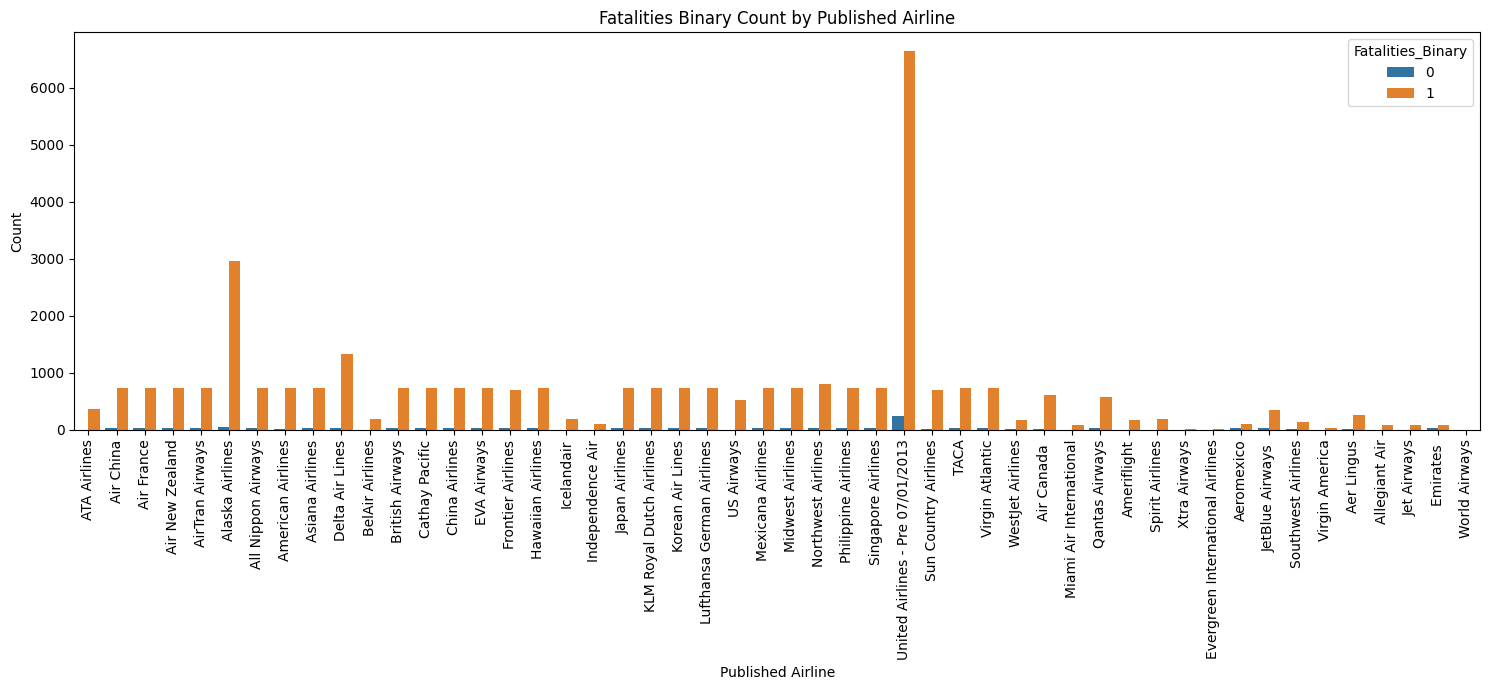

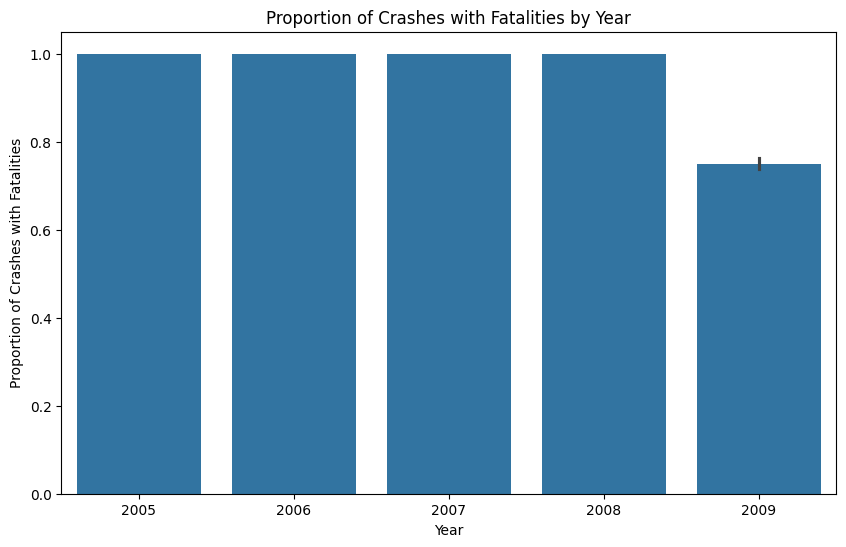

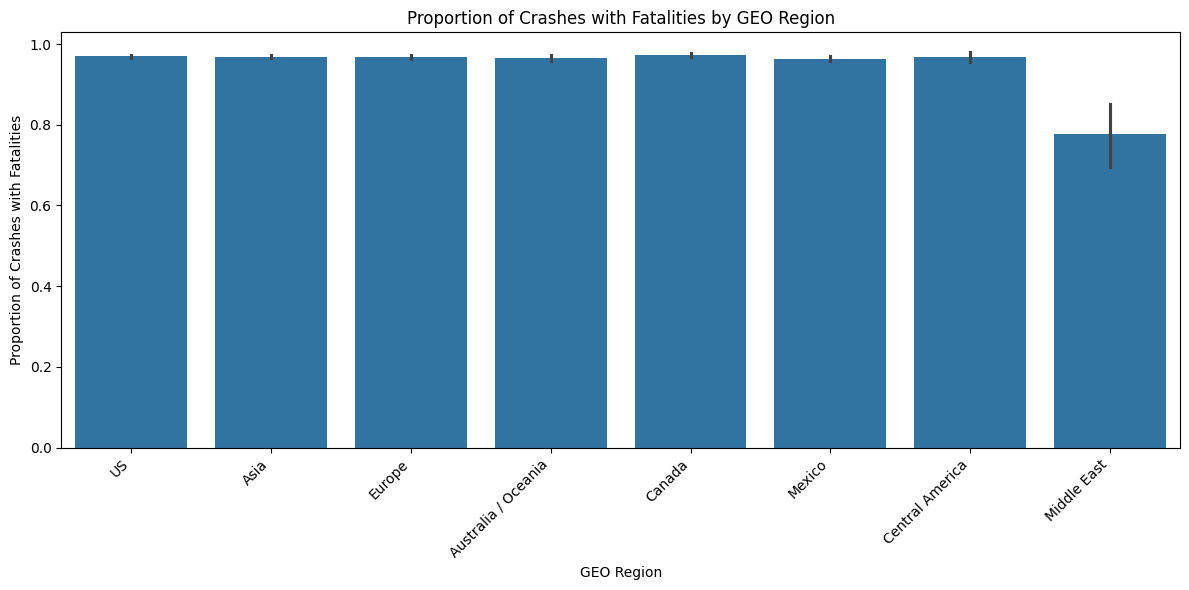

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add Fatalities_Binary to merged_df
merged_df['Fatalities_Binary'] = (merged_df['Fatalities'] > 0).astype(int)

# Relationship between Fatalities_Binary and Published Airline
plt.figure(figsize=(15, 7))
sns.countplot(data=merged_df, x='Published Airline', hue='Fatalities_Binary')
plt.title('Fatalities Binary Count by Published Airline')
plt.xlabel('Published Airline')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Relationship between Fatalities_Binary and Year
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x='Year', y='Fatalities_Binary', estimator=lambda x: sum(x)/len(x))
plt.title('Proportion of Crashes with Fatalities by Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Crashes with Fatalities')
plt.show()

# Relationship between Fatalities_Binary and GEO Region
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_df, x='GEO Region', y='Fatalities_Binary', estimator=lambda x: sum(x)/len(x))
plt.title('Proportion of Crashes with Fatalities by GEO Region')
plt.xlabel('GEO Region')
plt.ylabel('Proportion of Crashes with Fatalities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features (independent variables) and target (dependent variable)
features = ['Year', 'Adjusted Passenger Count'] + [col for col in merged_df_encoded.columns if 'Published Airline_' in col or 'GEO Region_' in col]
target = 'Fatalities'

X = merged_df_encoded[features]
y = merged_df_encoded[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Display the coefficients
print("\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef}")

print(f"\nIntercept: {model.intercept_}")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Load and prepare the data (re-executing the necessary steps)
air_traffic_df = pd.read_csv('/content/Air_Traffic_Passenger_Statistics.csv')
airplane_crashes_df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908-2.csv')

air_traffic_df = air_traffic_df.dropna()
airplane_crashes_df = airplane_crashes_df.dropna()

air_traffic_df = air_traffic_df.drop_duplicates()
airplane_crashes_df = airplane_crashes_df.drop_duplicates()

def remove_outliers_iqr(df, columns):
    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

air_traffic_numerical_cols = air_traffic_df.select_dtypes(include=['number']).columns.tolist()
airplane_crashes_numerical_cols = airplane_crashes_df.select_dtypes(include=['number']).columns.tolist()

air_traffic_df = remove_outliers_iqr(air_traffic_df, air_traffic_numerical_cols)
airplane_crashes_df = remove_outliers_iqr(airplane_crashes_df, airplane_crashes_numerical_cols)

# Extract the year from the 'Date' column
airplane_crashes_df['Year'] = pd.to_datetime(airplane_crashes_df['Date'], format='%m/%d/%Y').dt.year

# Merge the dataframes on 'Year'
merged_df = pd.merge(airplane_crashes_df, air_traffic_df, on='Year')


# Define features (independent variables) and target (dependent variable)
features = ['Year']
target = 'Fatalities'

X = merged_df[features]
y = merged_df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Display the coefficient and intercept
print("\nModel Coefficient:")
print(f"Year: {model.coef_[0]}")
print(f"\nIntercept: {model.intercept_}")